In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import datasets
from tensorflow.python.framework import ops

ops.reset_default_graph()
sess = tf.Session()

In [12]:
# 导入iris数据集
iris = datasets.load_iris()
# print(iris)
# print(iris.target)
# 将山鸢尾置为1，其他的置为0，注意这里要学会下面这种遍历目标的用法,这是处理数据很重要的手段
binary_target = np.array([1. if x == 0 else 0 for x in iris.target])  
# print(binary_target)
# 选取花瓣长度和花瓣宽度作为特征，这个特征位于第三列和第四列中。
iris_2d = np.array([[x[2], x[3]] for x in iris.data])
# print(iris_2d)

In [13]:
# 声明数据占位符，模型变量，批训练量大小
batch_size = 20
x1_data = tf.placeholder(tf.float32, shape=[None, 1])
x2_data = tf.placeholder(tf.float32, shape=[None, 1])
y_target = tf.placeholder(tf.float32, shape=[None, 1])
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [13]:
# 这里将定义一个线性模型表达式 X2 = X1*A + b , X2-(X1*A+b)=0将这个线性表达式和0比较实现分类
my_output = tf.subtract(x1_data, tf.add(tf.matmul(x2_data, A), b))

In [15]:
# 定义损失函数
loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)
# 声明优化器函数
my_opt = tf.train.GradientDescentOptimizer(0.05)
train_step = my_opt.minimize(loss)
# 初始化全局变量
init = tf.global_variables_initializer()
sess.run(init)

In [16]:
# 迭代1000次模型,注意下面代码的写法，非常的有用。
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size=batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict={x1_data: rand_x1, x2_data: rand_x2, y_target: rand_y})
    if(i+1) % 200 == 0:
        print('Step #'+str(i+1) + ' A = ' + str(sess.run(A)) + ' b = '+ str(sess.run(b)))

Step #200 A = [[ 8.7191267]] b = [[-3.54918766]]
Step #400 A = [[ 10.29879475]] b = [[-4.57371759]]


Step #600 A = [[ 11.18583488]] b = [[-5.36743927]]
Step #800 A = [[ 11.87209892]] b = [[-5.93668222]]


Step #1000 A = [[ 12.38808155]] b = [[-6.37238264]]


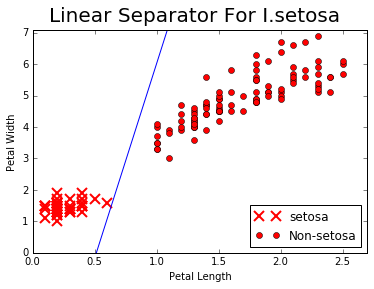

In [17]:
# Pull out slope/intercept
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)

# Create fitted line
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
  ablineValues.append(slope*i+intercept)

# Plot the fitted line over the data
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()